In [128]:
import numpy as np
import pandas as pd

In [129]:
data_df = pd.read_csv('ingredient.csv')

# UniVariate Analysis

In [130]:
data_df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Figure size 800x800 with 0 Axes>

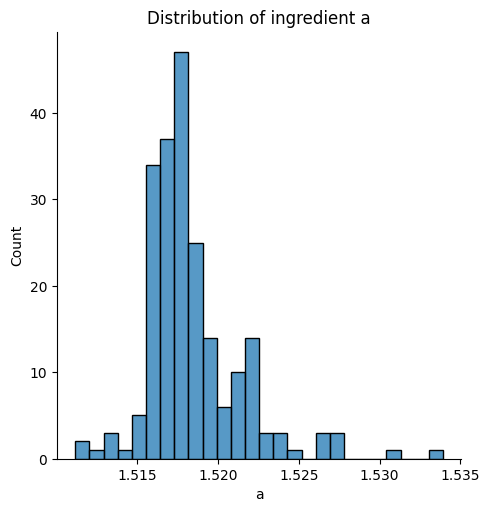

<Figure size 800x800 with 0 Axes>

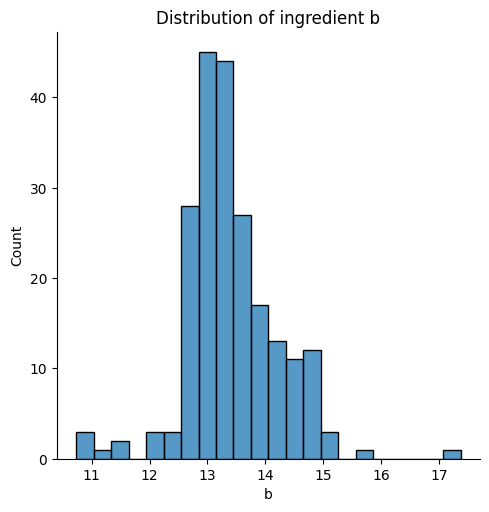

<Figure size 800x800 with 0 Axes>

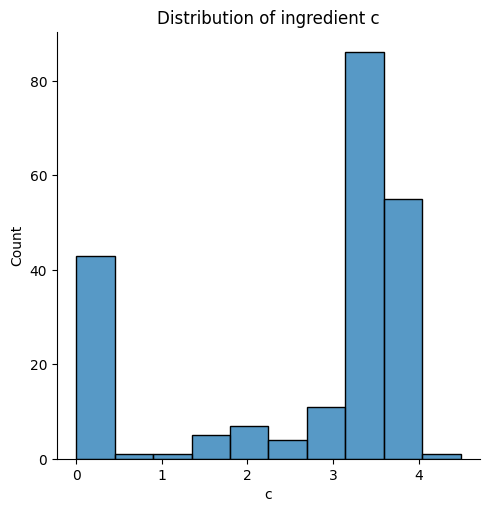

<Figure size 800x800 with 0 Axes>

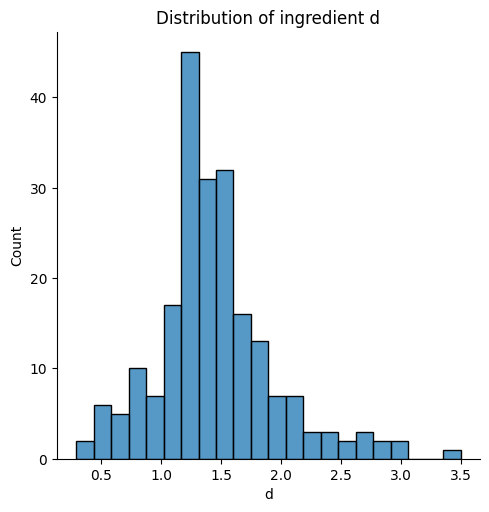

<Figure size 800x800 with 0 Axes>

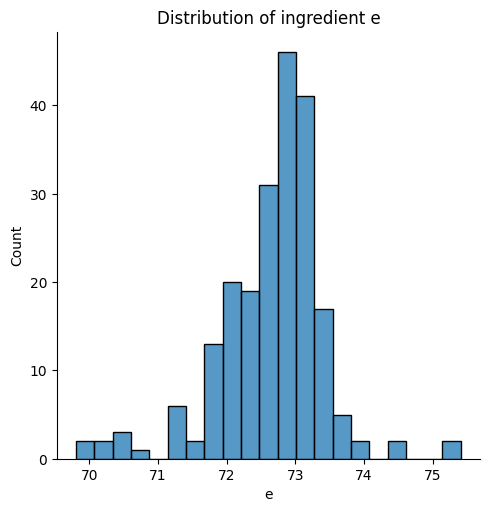

<Figure size 800x800 with 0 Axes>

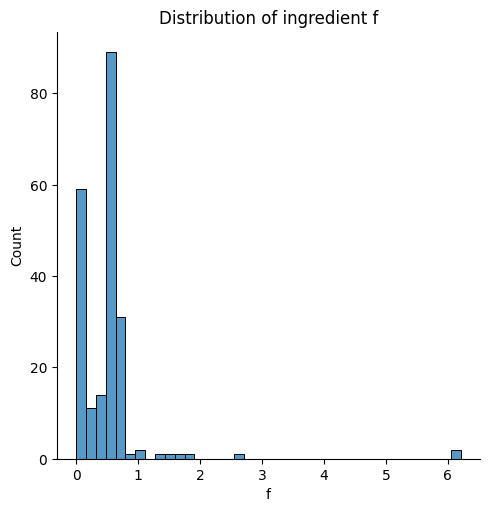

<Figure size 800x800 with 0 Axes>

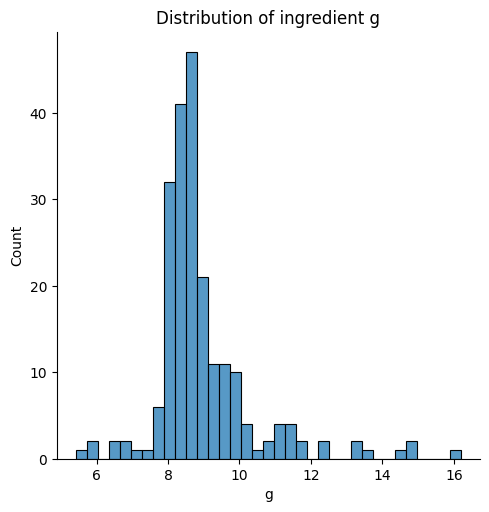

<Figure size 800x800 with 0 Axes>

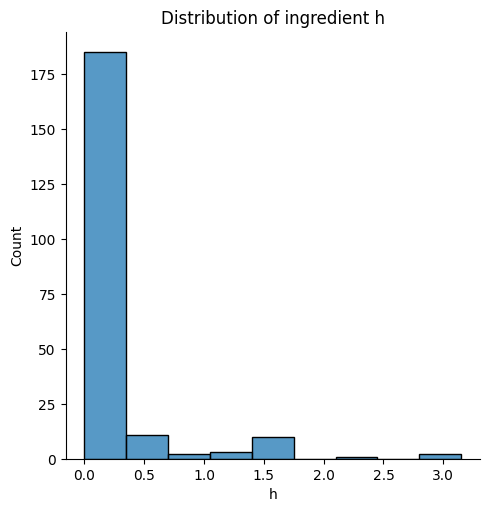

<Figure size 800x800 with 0 Axes>

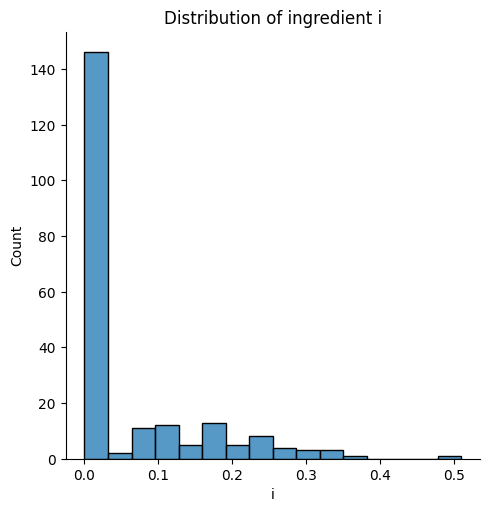

In [53]:
for col in data_df.columns:
    plt.figure(figsize=(8,8))
    sns.displot(data_df[col], kind='hist')
    plt.title(f'Distribution of ingredient {col}')

In [54]:
data_df['f'][data_df['f'] > data_df['f'].quantile(0.95)]

7      6.21
24     1.68
34     1.10
46     1.76
59     1.46
66     0.97
101    0.81
181    1.41
205    2.70
213    6.21
Name: f, dtype: float64

Text(0.5, 1.0, 'Distribution of ingredient f excluding outlier (95% quantile cutoff)')

<Figure size 800x800 with 0 Axes>

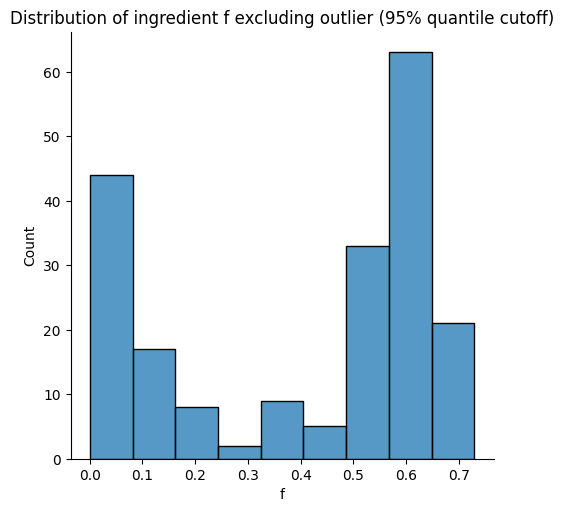

In [55]:
plt.figure(figsize=(8,8))
sns.displot(data_df['f'][data_df['f'] <  data_df['f'].quantile(0.95)], kind='hist')
plt.title(f'Distribution of ingredient f excluding outlier (95% quantile cutoff)')



Summary findings

1) Ingredients A, B, D, E and G have a relatively normal distribution.
2) Ingredients H, I are rarely added.
3) There are two formulations (indexed 7 and 213) that are an major outlier in terms of ingredient f added (6.21units compared to the median of 0.555), and several significant outliers above the 95% quantile cutoff hovering around 0.81 to 2.70 units of ingredient f.
4) Ingredients F (without the outliers) and C show two distinct groups: A peak at 0 and another peak at 0.6 and 3.5 respectively. These two ingredients will most likely be the major contributing factors to differentiating between groups of formulae. 


# Multivariate Analysis (Cross-correlation)

Text(0.5, 1.0, 'Cross-Correlation between ingredients')

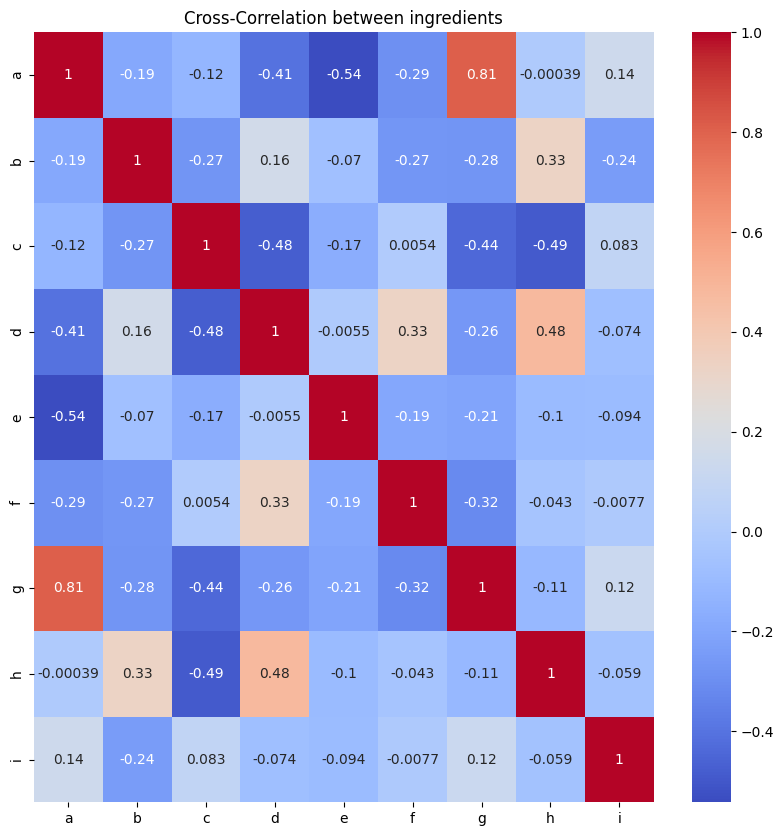

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(), cmap='coolwarm', annot=True)
plt.title('Cross-Correlation between ingredients')

In [57]:
# Average absolute correlation
abs(data_df.corr()).mean().mean()

0.31350971500655284

In [47]:
# As a control
rng = np.random.default_rng(seed=100000)
abs(pd.DataFrame(rng.random(size=(data_df.shape))).corr()).mean().mean()

0.15788352049452958

Summary findings

Note: High correlation value means that if one ingredient is included, the other is also most likely included. If the value is negative, that means that the two ingredients are rarely added together in a formula.
1) What is immediately apparent is that ingredients A and G are very highly correlated.
2) The average absolute correlation of all correlations is 0.31, which means that on average the ingredients are loosely correlated. For comparison, a randomly generated dataset with the same shape has a 0.16 average absolute correlation, and a dataset which has all identical rows will have average absolute correlation of 1.
3) Ingredients C and E have mostly negative correlation across all other ingredients. This means that if C and E are added, all other ingredients are less likely to be added
4) Notably, ingredient I has the weakest correlations across all other ingredients.

ALso note that ANOVA is not applicable here as there are no clear categorical variables

# Clustering

Gaussian Mixture Model (GMM) is chosen for clustering as most of the ingredients show gaussian-like(normal) distribution. The covariance type is chosen to be spherical as it is easier to be intepreted.

## Using 2 clusters as baseline

In [94]:
# Preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(data_df)

from sklearn.mixture import GaussianMixture

gmm_2 = GaussianMixture(n_components=2, covariance_type='spherical', random_state=190)
cluster_id_vec = gmm_2.fit_predict(data_df_scaled)

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [97]:
# Analysis of data-to-its-centroid distances for each cluster

distance_vec = np.linalg.norm(data_df_scaled - gmm_2.means_[cluster_ids], axis=1)
df_cluster_distance = pd.DataFrame({'cluster_id': cluster_id_vec,'distance': distance_vec}) 
groupby = df_cluster_distance.groupby('cluster_id')['distance']
df1 = groupby.count().rename('population')
df2 = groupby.agg(['min', 'max', 'mean', 'std'])
df2.columns = ['min', 'max', 'mean', 'std']
df3 = groupby.quantile([0.2, 0.5, 0.8]).unstack()
df3.columns = ['quantile_20', 'median', 'quantile_80']
cluster_description = pd.merge(df1, df2, how='inner', on='cluster_id')
cluster_description = pd.merge(cluster_description, df3, how='inner', on=['cluster_id'])
cluster_description['pct_population'] = cluster_description['population'] / cluster_description['population'].sum()
cluster_description['cluster_id'] = cluster_description.index
cols = ['cluster_id', 'population', 'pct_population', 'mean', 'std', 'min', 'quantile_20', 'median', 'quantile_80', 'max']

cluster_description = cluster_description[cols]
cluster_description.columns = [col + '_distance' if col in ['mean', 'std', 'min', 'quantile_20', 'median', 'quantile_80', 'max'] else col for col in cluster_description.columns]
cluster_description

,cluster_id,population,pct_population,mean_distance,std_distance,min_distance,quantile_20_distance,median_distance,quantile_80_distance,max_distance
cluster_id,,,,,,,,,,
0,0,97,0.453271,0.917176,0.332381,0.352362,0.618519,0.868227,1.235756,1.685516
1,1,117,0.546729,3.385521,1.626866,1.166476,2.334228,3.060404,3.836147,10.297643


In [91]:
# Analysis of model attributes (centroid and its variance)

centroid = pd.DataFrame(scaler.inverse_transform(gmm_2.means_), columns = data_df.columns)
centroid

,a,b,c,d,e,f,g,h,i
0,1.517367,13.130011,3.514567,1.380626,72.803287,0.571587,8.395068,0.002239,0.022680
1,1.519204,13.641360,1.986932,1.498931,72.522890,0.434417,9.429206,0.320283,0.085861


In [92]:
gmm_2.covariances_

array([0.10817894, 1.57270871])

- Cluster 1 has a very high variance (evident from the covariance model attribute and the high mean_distance). This cluster can probably be further broken down into several subclusters by increasing n_components or subclustering on Cluster 1 itself.

In [113]:
# Population mean
data_df.mean()

a     1.518365
b    13.407850
c     2.684533
d     1.444907
e    72.650935
f     0.497056
g     8.956963
h     0.175047
i     0.057009
dtype: float64

In [106]:
# Analysis of main feature contributor to the separation of clusters
col_features = data_df.columns
df = pd.DataFrame(data_df_scaled.copy(), columns=col_features)
df['cluster_id'] = cluster_id_vec
# Deviation is median of each feature of each cluster minus the population centroid. Since pop centroid is zero is scaled space, no need to subtract
scaled_feature_deviation_from_pop_centroid = df.groupby('cluster_id').mean().transpose()
scaled_feature_deviation_from_pop_centroid

cluster_id,0,1
a,-0.335557,0.278197
b,-0.341808,0.283380
c,0.575632,-0.477233
d,-0.119752,0.099282
e,0.205314,-0.170218
f,0.117810,-0.097672
g,-0.402659,0.333828
h,-0.349967,0.290144
i,-0.362684,0.300687


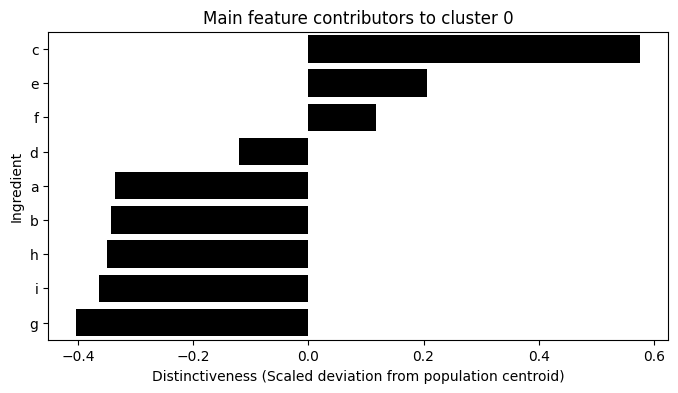

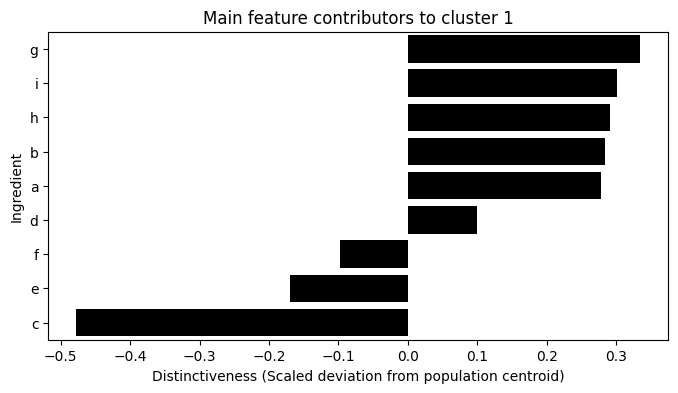

In [112]:
for cid in scaled_feature_deviation_from_pop_centroid.columns:
    feat_cont_srs=scaled_feature_deviation_from_pop_centroid[cid]
    feat_cont_srs=feat_cont_srs.sort_values(ascending=False)
    plt.figure(figsize = (8,4))
    sns.barplot(x=feat_cont_srs, y=feat_cont_srs.index, color='k')
    plt.title(f"Main feature contributors to cluster {cid}")
    plt.xlabel(f"Distinctiveness (Scaled deviation from population centroid)")
    plt.ylabel(f"Ingredient")

- The two clusters are differentiated mainly on the ingredient C. Cluster 0 has ingredient C value of 3.51 on average, whereas Cluster 1 has ingredient C value of 1.99 on average, while the population average is 2.68.

In [114]:
# MANOVA test to see if clusters are truly distinct from each other

from statsmodels.multivariate.manova import MANOVA
df = data_df.copy()
df['cluster_id'] = cluster_id_vec
fit = MANOVA.from_formula('a + b + c + d + e + f + g + h + i ~ cluster_id', data=df)
print(fit.mv_test())




                        Multivariate linear model
                                                                         
-------------------------------------------------------------------------
       Intercept           Value     Num DF  Den DF     F Value    Pr > F
-------------------------------------------------------------------------
          Wilks' lambda       0.0000 9.0000 204.0000 32352057.3252 0.0000
         Pillai's trace       1.0000 9.0000 204.0000 32352057.3252 0.0000
 Hotelling-Lawley trace 1427296.6467 9.0000 204.0000 32352057.3252 0.0000
    Roy's greatest root 1427296.6467 9.0000 204.0000 32352057.3252 0.0000
-------------------------------------------------------------------------
                                                                         
---------------------------------------------------------------------------
           cluster_id         Value    Num DF    Den DF    F Value   Pr > F
----------------------------------------------------------

As p-value <<< 0.05, there are significant differences between the two clusters

# Selection of Number of Clusters

Use BIC as stoppage condition: if BIC value plateaus, select that n_components as number of clusters

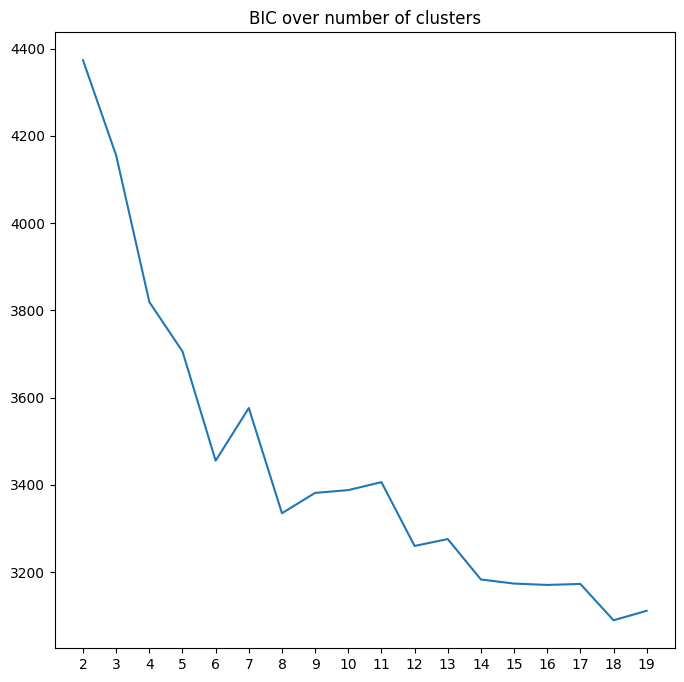

In [117]:
bic_list = []
for k in range(2, 20):
    gmm = GaussianMixture(n_components=k, covariance_type='spherical', random_state=190)
    cluster_id_vec = gmm.fit_predict(data_df_scaled)
    bic = gmm.bic(data_df_scaled)
    bic_list.append(bic)

plt.figure(figsize=(8,8))
sns.lineplot(y=bic_list, x=range(2,20))
plt.title("BIC over number of clusters")
plt.xticks(range(2, 20));

From the BIC values, clusters 6, 8, 12 and 14 are suitable candidates for number of clusters. 8 is chosen as it is not too large of a number (more clusters might mean redundant clusters and more different to interpret), and further increase in number of clusters yields only slight improvements in BIC.

## Rerun same analysis in n_components = 8

In [118]:
# Preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(data_df)

from sklearn.mixture import GaussianMixture

gmm_8 = GaussianMixture(n_components=8, covariance_type='spherical', random_state=190)
cluster_id_vec = gmm_8.fit_predict(data_df_scaled)

# Analysis of data-to-its-centroid distances for each cluster

distance_vec = np.linalg.norm(data_df_scaled - gmm_2.means_[cluster_ids], axis=1)
df_cluster_distance = pd.DataFrame({'cluster_id': cluster_id_vec,'distance': distance_vec}) 
groupby = df_cluster_distance.groupby('cluster_id')['distance']
df1 = groupby.count().rename('population')
df2 = groupby.agg(['min', 'max', 'mean', 'std'])
df2.columns = ['min', 'max', 'mean', 'std']
df3 = groupby.quantile([0.2, 0.5, 0.8]).unstack()
df3.columns = ['quantile_20', 'median', 'quantile_80']
cluster_description = pd.merge(df1, df2, how='inner', on='cluster_id')
cluster_description = pd.merge(cluster_description, df3, how='inner', on=['cluster_id'])
cluster_description['pct_population'] = cluster_description['population'] / cluster_description['population'].sum()
cluster_description['cluster_id'] = cluster_description.index
cols = ['cluster_id', 'population', 'pct_population', 'mean', 'std', 'min', 'quantile_20', 'median', 'quantile_80', 'max']

cluster_description = cluster_description[cols]
cluster_description.columns = [col + '_distance' if col in ['mean', 'std', 'min', 'quantile_20', 'median', 'quantile_80', 'max'] else col for col in cluster_description.columns]
cluster_description

,cluster_id,population,pct_population,mean_distance,std_distance,min_distance,quantile_20_distance,median_distance,quantile_80_distance,max_distance
cluster_id,,,,,,,,,,
0,0,76,0.355140,0.792882,0.236998,0.352362,0.591435,0.809029,0.945824,1.659238
1,1,13,0.060748,4.926649,1.425779,2.950059,3.870958,4.812984,5.956995,7.421088
2,2,41,0.191589,2.171259,0.683006,1.166476,1.470931,2.112362,2.850705,3.552617
3,3,23,0.107477,3.703987,1.572432,1.819713,2.468934,3.162145,5.005827,8.027004
4,4,1,0.004673,9.395590,NaN,9.395590,9.395590,9.395590,9.395590,9.395590
5,5,2,0.009346,10.258047,0.055998,10.218451,10.234289,10.258047,10.281805,10.297643
6,6,36,0.168224,2.219080,0.745778,0.948479,1.454068,2.361828,2.891445,3.800425
7,7,22,0.102804,3.488851,0.388440,2.081542,3.312857,3.565038,3.774885,3.994753


In [119]:
centroid = pd.DataFrame(scaler.inverse_transform(gmm_8.means_), columns = data_df.columns)
centroid

,a,b,c,d,e,f,g,h,i
0,1.517109,13.079661,3.502724e+00,1.389860,72.877882,0.582901,8.348211,1.863227e-03,5.596585e-03
1,1.517107,14.324749,2.066073e+00,1.748366,72.376908,0.910494,7.681887,7.052980e-01,7.165298e-02
2,1.520629,13.739623,3.450770e+00,1.076599,72.037439,0.235522,9.312004,2.482883e-02,3.739741e-02
3,1.522608,13.010412,5.639993e-01,1.330139,72.576681,0.278239,12.040157,2.641449e-03,5.612182e-02
4,1.531250,10.730000,5.773160e-15,2.100000,69.810000,0.580000,13.300000,3.150000e+00,2.800000e-01
5,1.513185,13.010000,2.664535e-15,3.030000,70.590000,6.210000,6.945000,1.942890e-16,6.245005e-17
6,1.517352,13.015266,3.494852e+00,1.321242,72.861155,0.560039,8.501760,1.371760e-02,1.992697e-01
7,1.516480,14.563304,7.995417e-02,2.269317,73.219929,0.019558,8.747021,1.035452e+00,1.772800e-02


In [120]:
gmm_8.covariances_

array([6.91855299e-02, 2.28710382e+00, 2.66678388e-01, 1.03534063e+00,
       1.00000002e-06, 2.33404738e-03, 1.69688627e-01, 2.29062647e-01])

- There is a large cluster of ID 0 that is comparatively dense and self-similar (low mean distance and centroid variance)
- 2 clusters are clearly outliers (ID 4 and 5). These are formulae that are do not belong to any other major clusters.

In [121]:
# Population mean
data_df.mean()

a     1.518365
b    13.407850
c     2.684533
d     1.444907
e    72.650935
f     0.497056
g     8.956963
h     0.175047
i     0.057009
dtype: float64

In [122]:
# Analysis of main feature contributor to the separation of clusters
col_features = data_df.columns
df = pd.DataFrame(data_df_scaled.copy(), columns=col_features)
df['cluster_id'] = cluster_id_vec
# Deviation is median of each feature of each cluster minus the population centroid. Since pop centroid is zero is scaled space, no need to subtract
scaled_feature_deviation_from_pop_centroid = df.groupby('cluster_id').mean().transpose()
scaled_feature_deviation_from_pop_centroid

cluster_id,0,1,2,3,4,5,6,7
a,-0.412105,-0.413855,0.745594,1.370970,4.252673,-1.709845,-0.348535,-0.622150
b,-0.402099,1.193270,0.407100,-0.468598,-3.286943,-0.488344,-0.494140,1.417560
c,0.565123,-0.419027,0.534982,-1.501136,-1.865511,-1.865511,0.569186,-1.809286
d,-0.109439,0.603246,-0.722311,-0.217596,1.315180,3.182268,-0.249650,1.654651
e,0.292008,-0.411342,-0.806396,-0.067603,-3.676472,-2.667069,0.293919,0.736431
f,0.127678,0.693759,-0.390193,-0.340941,0.127475,8.780145,0.099299,-0.733879
g,-0.422487,-0.978480,0.241605,2.172646,3.058855,-1.417050,-0.333779,-0.148007
h,-0.349163,1.169904,-0.300267,-0.352877,5.997210,-0.352877,-0.324878,1.734497
i,-0.530956,0.204851,-0.169956,-0.040797,2.293888,-0.586451,1.482364,-0.404092


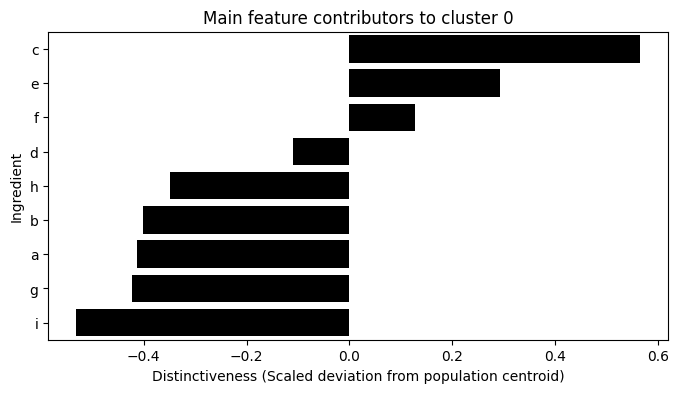

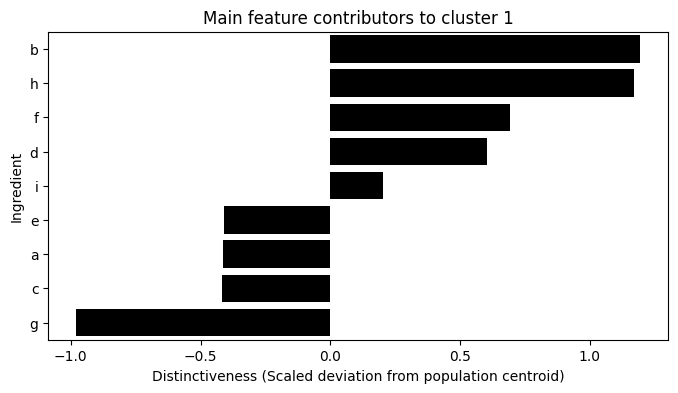

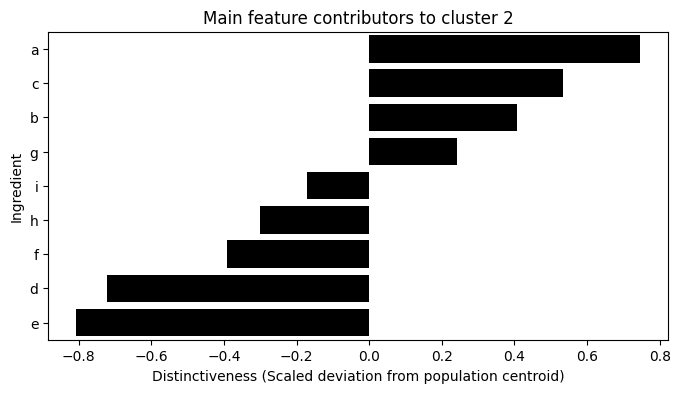

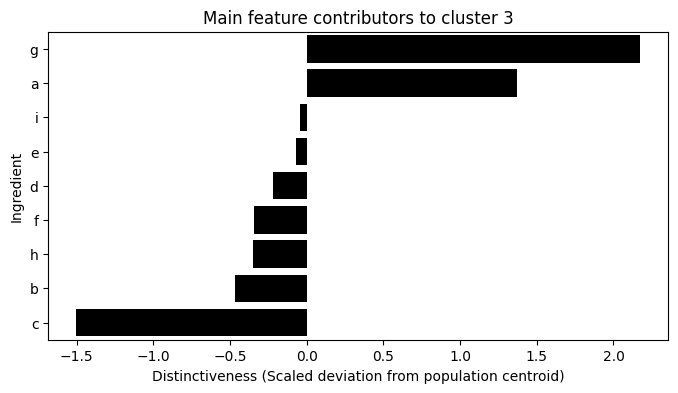

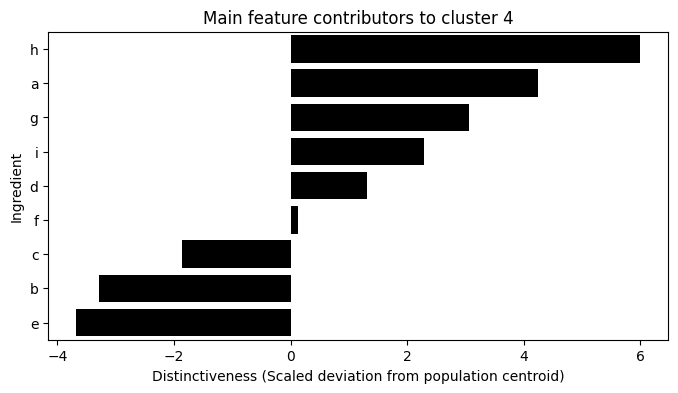

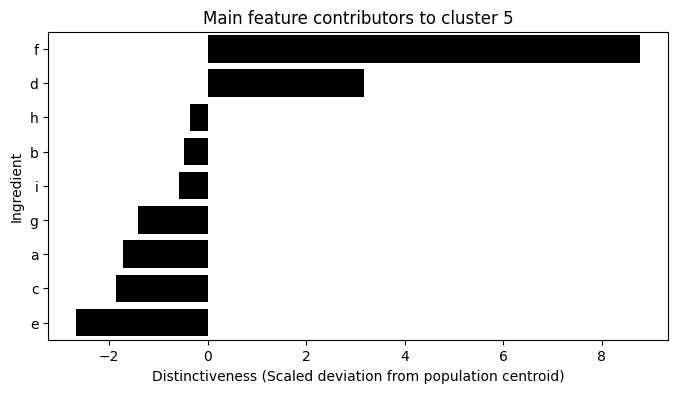

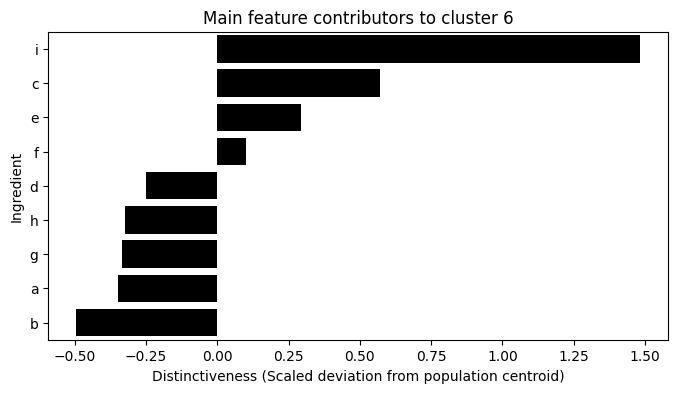

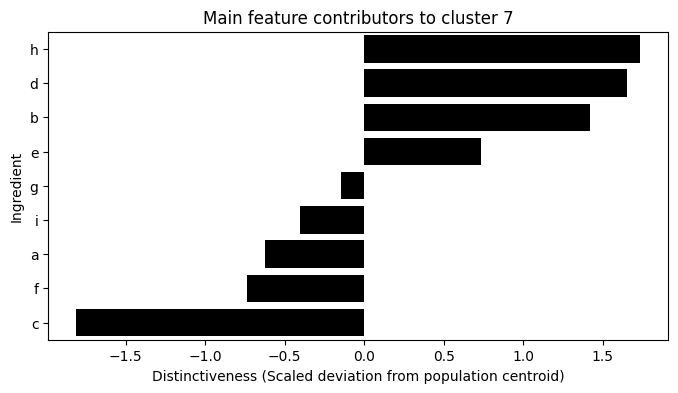

In [123]:
for cid in scaled_feature_deviation_from_pop_centroid.columns:
    feat_cont_srs=scaled_feature_deviation_from_pop_centroid[cid]
    feat_cont_srs=feat_cont_srs.sort_values(ascending=False)
    plt.figure(figsize = (8,4))
    sns.barplot(x=feat_cont_srs, y=feat_cont_srs.index, color='k')
    plt.title(f"Main feature contributors to cluster {cid}")
    plt.xlabel(f"Distinctiveness (Scaled deviation from population centroid)")
    plt.ylabel(f"Ingredient")

In [125]:
df_inc_cid = data_df.copy()
df_inc_cid['cluster_id'] = cluster_id_vec
df_inc_cid[df_inc_cid['cluster_id'] == 4]

,a,b,c,d,e,f,g,h,i,cluster_id
1,1.53125,10.73,0.0,2.1,69.81,0.58,13.3,3.15,0.28,4


- Cluster 0 here is very similar to the cluster 0 when only 2 clusters were generated, distincted mainly on the ingredient C.
- Cluster 1 is distincted based on ingredient B, H and G. From the cross-correlation analysis, B and H are relatively correlated features (0.33).
- Cluster 2 is distincted based on ingredient A and E. 
- Cluster 3 is distincted based on ingredient A, C and G.
- Cluster 4 consists of 1 formula with a abnormally high amount of ingredient h (3.15 vs mean of 0.17) as well as other contributing factors from A, B, E, G etc., and therefore is clustered away from other major clusters
- Cluster 5 consists of 2 formulae with a abnormally high amount of ingredient f (6.21 vs mean of 0.50), and therefore are clustered away from other major clusters
- Cluster 6 is distincted based on ingredient I.
- Cluster 7 is distincted based on (the lack of) ingredient C, balanced by the increase in H, D and B

=================================

Further steps:
1. Try clustering on 6, 12, and 14 number of clusters and compare the results
2. Pairwise MANOVA on each pair of clusters to make sure that each cluster is distinct (likely an overkill)
3. If the model is meant to be deployed, selection of number of clusters can be automated by using a rolling window; If the BIC value doesn't significantly change within a tolerance range, use that as the number of clusters.
4. Running other non-gaussian-like clustering algorithms like HDBScan, Kohonen networks.